

# Problema Claficacao - `binaria` --> `[0, 1]` ou `[no, yes]`


## Principio gerais para criar modelos
- Preparacao de dados 
- Separar dados para treinar e testar o modelo 
- Treinar o modelo
- Testar / calibrar
- Implementar (por em producao)


# Importacao da Biblioteca

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# Machine Learning - Classificacao Binaria
from sklearn.linear_model import LogisticRegression

# Verificacoa da eficacia
from sklearn.metrics import  accuracy_score

## Leitura de Dados

In [3]:
df = pd.read_csv('bank-full.csv', delimiter = ';')

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Variable Objectivo

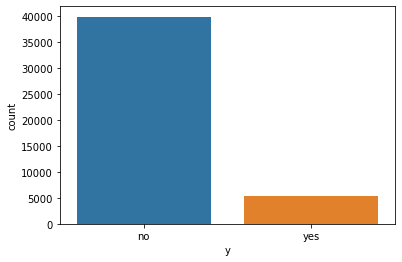

In [4]:
sns.countplot(df.y)

## Prepracao/transformacao de dados para treinar algoritmo (machine learning)
Vamos preparar ou transformar os dados categoricos (textos) em numericos para serem executados em algortimos. Convertemos porque  os algoritimos da biblioteca `sklearn` nao suportam dados no formato texto (`object`), muitos algoritimos tambem nao suportam incluindo a `Neural Network` (redes neurais).


Para isso, vamos usar a tecnica chamada `ONE HOT ENCODING`; ela funciona criando novas variaveis igual a quantidade de categories e atribuindo 1 (na acorrencia dessa categoria na variavel mae) ou 0 (se essa categoria nessa linha, row, nao ocorreu) como ilustrado na figura abaixo.

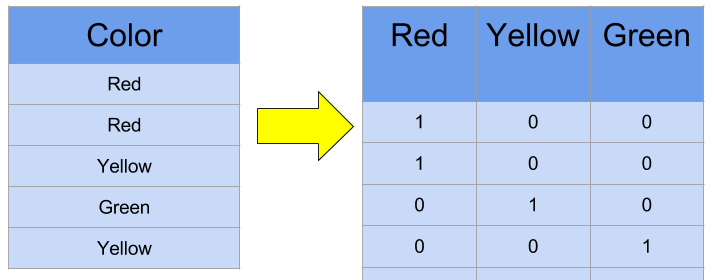

In [5]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [6]:
pd.get_dummies(df['job'], prefix='job')

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,0,1,0,0
45207,0,0,0,0,0,1,0,0,0,0,0,0
45208,0,0,0,0,0,1,0,0,0,0,0,0
45209,0,1,0,0,0,0,0,0,0,0,0,0


In [9]:
T

True

In [10]:
True + 1

2

In [8]:
df['job']

0          management
1          technician
2        entrepreneur
3         blue-collar
4             unknown
             ...     
45206      technician
45207         retired
45208         retired
45209     blue-collar
45210    entrepreneur
Name: job, Length: 45211, dtype: object

### Eliminar a variavel duracao - `duration`

In [11]:
df.drop(['duration'], axis=1, inplace=True)

### Transformar - `One Hot  Enconding`

In [12]:
X = pd.get_dummies(df.iloc[:, :-1])

In [14]:
X

,age,balance,day,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,1,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,1,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,1,-1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,1,-1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,1,-1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,3,-1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,2,-1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,5,184,3,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,668,17,4,-1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [13]:
y = pd.get_dummies(df.y)['yes']

In [15]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: yes, Length: 45211, dtype: uint8

### Equilibrar dados da subscricao
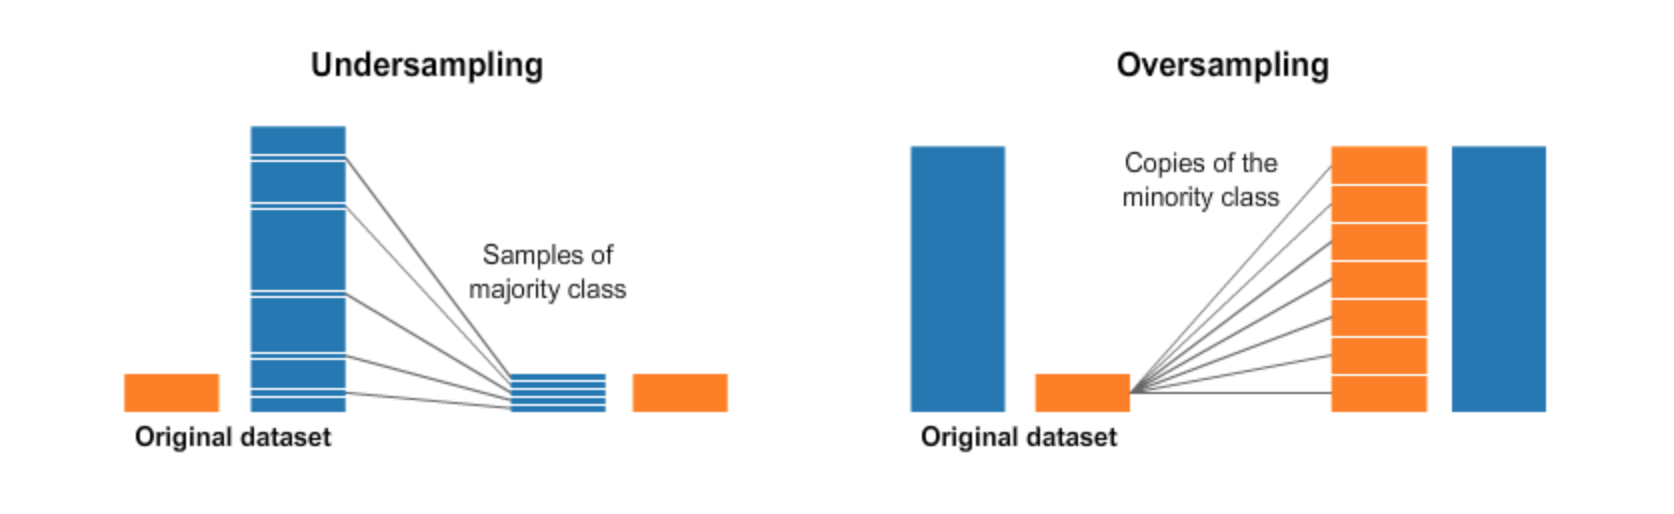

In [16]:
from imblearn.over_sampling import SMOTE

In [17]:
sm =  SMOTE()
X, y =  sm.fit_resample(X, y)

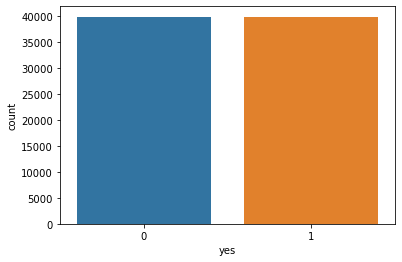

In [18]:
sns.countplot(y)

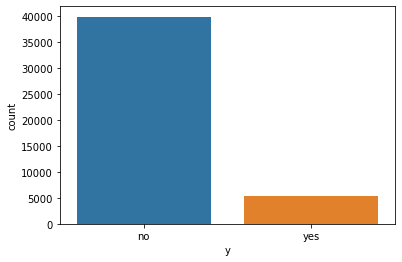

In [19]:
sns.countplot(df.y)

### Separacao: dados treino e teste

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state= 123)

# MODELO - Machine Learning

In [22]:
lr = LogisticRegression()

In [23]:
modelo =  lr.fit(X_treino, y_treino)

C:\Users\lmanu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [24]:
X_teste

,age,balance,day,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
10925,42,753,17,1,-1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
75176,33,0,28,4,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
27633,52,2618,21,2,-1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
65503,48,872,18,2,-1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
56541,32,0,4,2,275,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53015,57,-88,6,1,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17153,30,190,28,3,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
68074,37,2969,11,1,93,6,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8312,59,104,2,5,-1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [25]:
predicao = modelo.predict(X_teste)

In [26]:
accuracy_score(y_teste, predicao)

0.8363078464525017

In [27]:
importancia_variaveis =  pd.DataFrame(index= X.columns)
importancia_variaveis['coeficientes'] = modelo.coef_[0]

In [28]:
importancia_variaveis.sort_values

<bound method DataFrame.sort_values of                      coeficientes
age                      0.033809
balance                  0.000020
day                      0.021238
campaign                -0.073321
pdays                    0.004073
previous                -0.030796
job_admin.              -0.350035
job_blue-collar         -0.691561
job_entrepreneur        -0.137105
job_housemaid           -0.128472
job_management          -0.510836
job_retired             -0.110770
job_self-employed       -0.134444
job_services            -0.300949
job_student             -0.014472
job_technician          -0.495693
job_unemployed          -0.107316
job_unknown             -0.028105
marital_divorced        -0.419596
marital_married         -1.088269
marital_single          -0.202431
education_primary       -0.569211
education_secondary     -0.870647
education_tertiary      -0.432770
education_unknown       -0.163358
default_no               0.234892
default_yes             -0.062388
housing_n

## Para verificacao da eficiencia do modelo

In [31]:
from sklearn.metrics import confusion_matrix

In [35]:

tn, fp, fn, tp = confusion_matrix(y_teste, predicao).ravel()

In [37]:
import numpy as np

In [38]:
confusion_mat = pd.DataFrame(np.array([[tp, fp], [tn, fn]]), 
                             columns=['Pred Positive', 'Pred Negative'],
                            index=['A. Positive', 'A. Negative'])
confusion_mat

,Pred Positive,Pred Negative
A. Positive,6719,1400
A. Negative,6636,1214


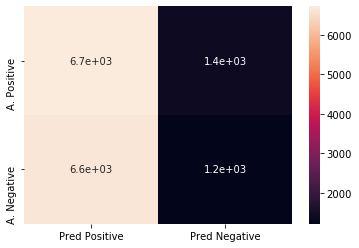

In [39]:
sns.heatmap(np.round(confusion_mat, 0), annot=True)